In [4]:
import pandas as pd
import plotly.express as px

In [5]:
# First re-import the station metadata!
station_metadata = pd.read_csv('GEMStat_station_metadata.csv', sep=';', encoding='ISO-8859-1')


In [6]:
oxygen_df = pd.merge(oxygen_df, station_metadata, how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_90660/3956276557.py:6: DtypeWarning:

Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.



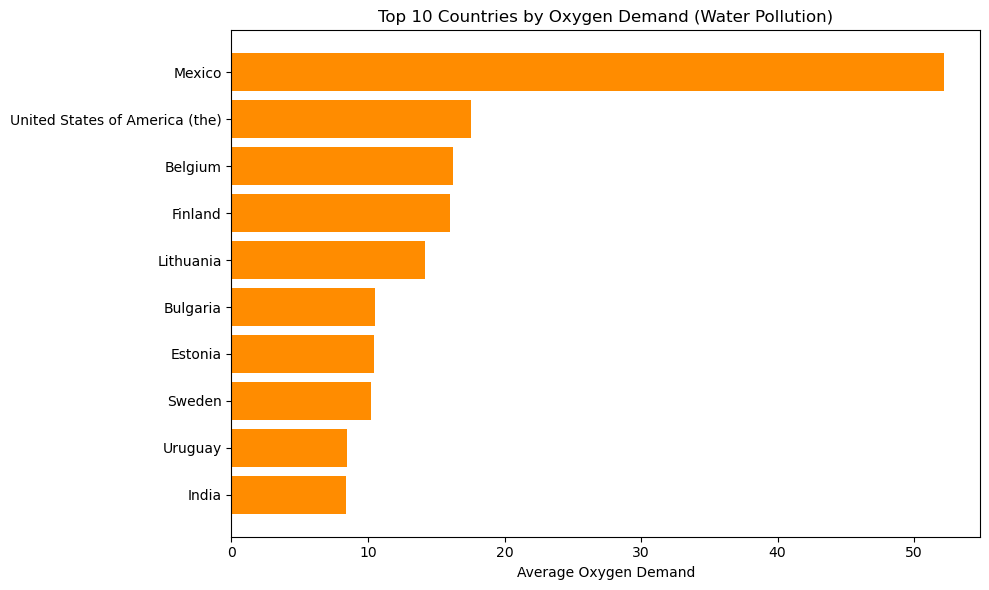

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load Oxygen Demand data
oxygen_df = pd.read_csv('Oxygen_Demand.csv', sep=';')  # Make sure separator matches

# If necessary: add country info like we did before
oxygen_df = pd.merge(oxygen_df, station_metadata, how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')

# Calculate average oxygen demand per country
oxygen_by_country = oxygen_df.groupby('Country Name')['Value'].mean().reset_index()

# Plot as world map
fig = px.choropleth(
    oxygen_by_country,
    locations='Country Name',
    locationmode='country names',
    color='Value',
    color_continuous_scale='YlOrRd',
    title='Average Oxygen Demand Levels by Country'
)
fig.show()
fig.write_html("oxygen_map.html", include_plotlyjs='cdn')



# OPTIONAL: Top 10 worst countries
top10_oxygen = oxygen_by_country.sort_values(by='Value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10_oxygen['Country Name'], top10_oxygen['Value'], color='darkorange')
plt.xlabel('Average Oxygen Demand')
plt.title('Top 10 Countries by Oxygen Demand (Water Pollution)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
